## Задание 2(2)

Функция плотности распределения для выборки:
$$f_\theta(x) = \frac{\theta^x}{x!} \cdot e^{-\theta}$$

Функция плотности априорного распределения параметра:
$$\pi(\theta) = \frac{1}{\Gamma(k) \lambda^k} \cdot \theta^{k-1} e^{-\frac{\theta}{\lambda}}$$


Функция правдоподобия для выборки $(X_1, ..., X_n)$:
$$L(X|\theta) = \prod_{i=1}^n \left[ \frac{\theta^{X_i}}{X_i!} \cdot e^{-\theta} \right] = \frac{\theta^X}{\prod_{i=1}^n(X_i!)} \cdot e^{-n\theta} \text{,}$$
где $X = \sum_{i=1}^n X_i$

Тогда:
$$L(X|\theta)\pi(\theta) = \frac{\theta^X}{\prod_{i=1}^n(X_i!)} e^{-n\theta} \cdot \frac{1}{\Gamma(k)\lambda^k} \theta^{k-1} e^{-\frac{\theta}{\lambda}}$$
$$\int_0^{\infty} L(X|\theta)\pi(\theta) d\theta 
= \int_0^{\infty} \left[ \frac{\theta^X}{\prod_{i=1}^n(X_i!)} e^{-n\theta} \cdot \frac{1}{\Gamma(k)\lambda^k} \theta^{k-1} e^{-\frac{\theta}{\lambda}} \right] d\theta 
= \frac{1}{\prod_{i=1}^n(X_i!) \cdot \Gamma(k) \lambda^k} \int_0^{\infty} \left[ e^{-\theta(n + \frac{1}{\lambda})} \theta^{X + k - 1} \right]d\theta$$

Умножим и разделим на $\frac{1}{\Gamma(X + k) \left( \frac{\lambda}{n\lambda + 1} \right)^{X + k}}$, под правым интегралом получим плотность гамма-распределения, поэтому он будет равен 1. Тогда

$$\int_0^{\infty} L(X|\theta)\pi(\theta) d\theta = \frac{\Gamma(X + k) \left( \frac{\lambda}{n\lambda + 1} \right)^{X + k}}{\prod_{i=1}^n(X_i!) \cdot \Gamma(k) \lambda^k}$$

По теореме Байеса:

$$\begin{aligned}
p(\theta|X) = \frac{L(X|\theta) \cdot \pi(\theta)}{\int_0^{\infty} L(X|\theta)\pi(\theta) d\theta}
&= \frac{\theta^X}{\prod_{i=1}^n(X_i!)} e^{-n\theta} \cdot \frac{1}{\Gamma(k)\lambda^k} \theta^{k-1} e^{-\frac{\theta}{\lambda}} \cdot \frac{\prod_{i=1}^n(X_i!) \cdot \Gamma(k) \lambda^k}{\Gamma(X + k) \left( \frac{\lambda}{n\lambda + 1} \right)^{X + k}}\\
&= \frac{1}{\Gamma(X + k) \left( \frac{\lambda}{n\lambda + 1} \right)^{X + k}} \cdot \theta^{X+k-1} e^{-\theta \left(\frac{n\lambda + 1}{\lambda}\right)} \sim \Gamma(X + k, \frac{\lambda}{n\lambda + 1})
\end{aligned}$$

Тогда байесовская оценка относительно среднеквадратичной ошибки:
$$\hat{\theta}_B = E[\theta | X] = (X + k)\left(\frac{\lambda}{n\lambda + 1}\right) = \left(\overline{X} + \frac{k}{n}\right)\left( \frac{\lambda}{\lambda + \frac{1}{n}} \right)$$


In [1]:
from matplotlib import pyplot as plt
from scipy.stats import moment, poisson

Условия, при которых будут проводиться эксперименты (размеры и количество выборок, теоретическое значение $\theta$ и значения для априорного распределения):

In [2]:
sample_sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
sample_count = 1000
theoretical_theta = 5
k = 1
lmbda = 1

Функции вычисления выборочных моментов

In [3]:
def sample_moment(sample, order):
    return moment(sample, moment=order, center=0)

def sample_central_moment(sample, order):
    mean = sample_moment(sample, 1)
    return moment(sample, moment=order, center=mean)

### Эксперимент

In [4]:
def print_hist(sample, bins=50):
    fig, ax = plt.subplots(1, 1)
    ax.hist(sample, bins=bins, density=True, color='royalblue')
    plt.show()

Size 1
	Mean: -1.979500
	Var: 1.268830
	Count > 1e-1: 956


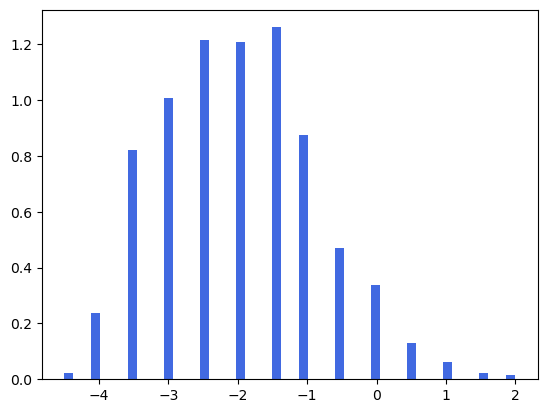

Size 2
	Mean: -1.360000
	Var: 1.054622
	Count > 1e-1: 951


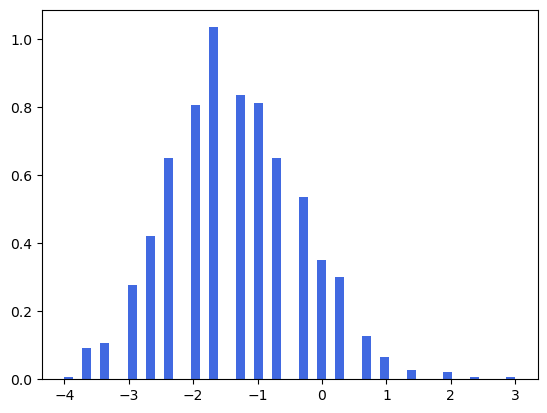

Size 5
	Mean: -0.668500
	Var: 0.715469
	Count > 1e-1: 945


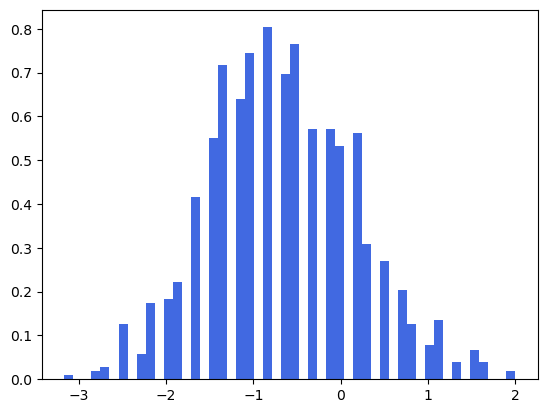

Size 10
	Mean: -0.338909
	Var: 0.418975
	Count > 1e-1: 851


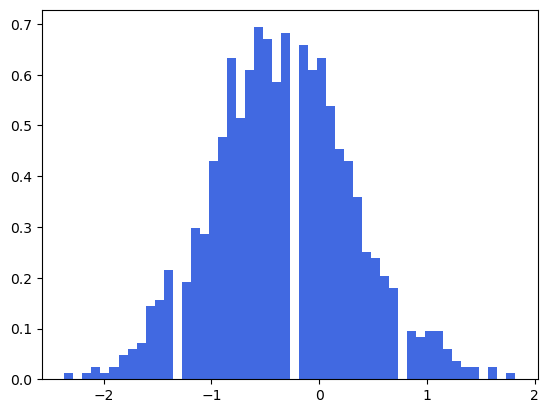

Size 20
	Mean: -0.174143
	Var: 0.219649
	Count > 1e-1: 810


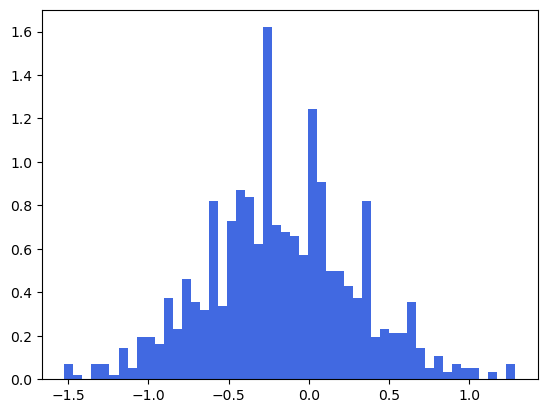

Size 50
	Mean: -0.071961
	Var: 0.090099
	Count > 1e-1: 731


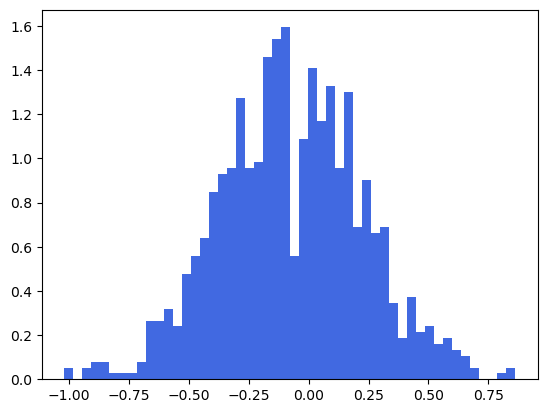

Size 100
	Mean: -0.039723
	Var: 0.048030
	Count > 1e-1: 650


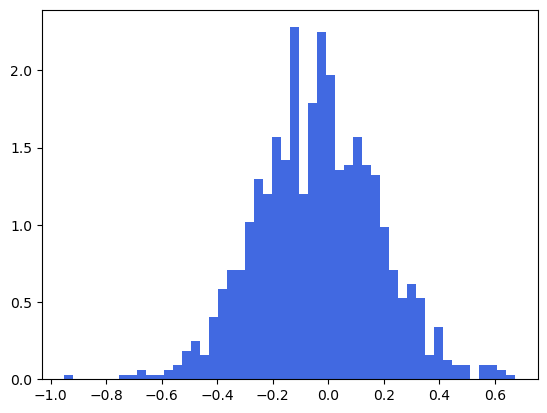

Size 200
	Mean: -0.021896
	Var: 0.023107
	Count > 1e-1: 491


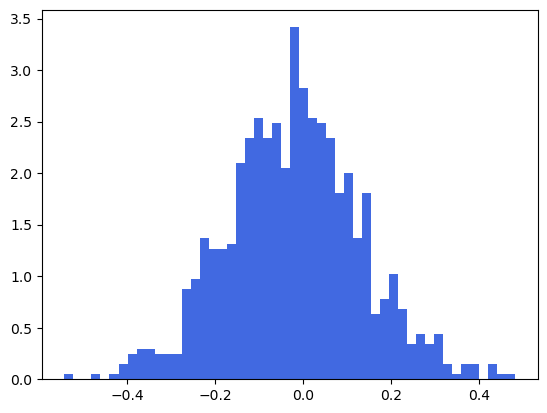

Size 500
	Mean: -0.007008
	Var: 0.009917
	Count > 1e-1: 338


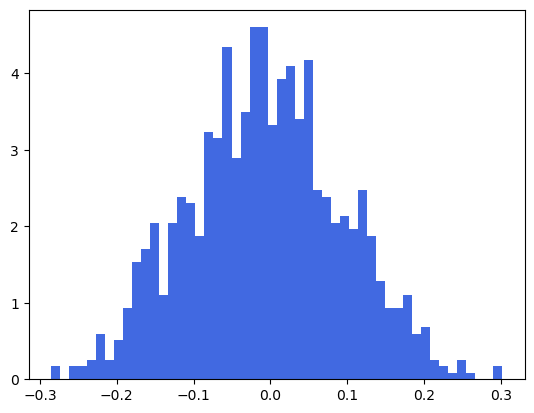

Size 1000
	Mean: -0.001209
	Var: 0.005103
	Count > 1e-1: 161


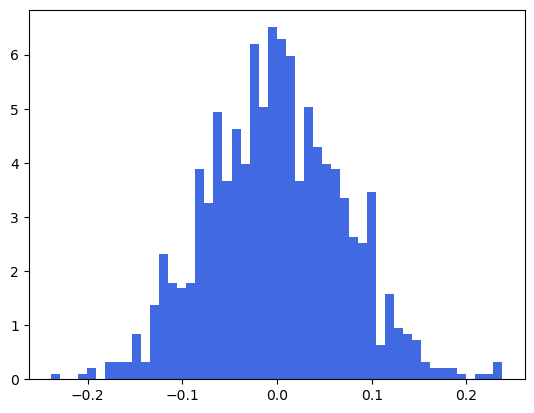

Size 2000
	Mean: -0.002305
	Var: 0.002459
	Count > 1e-1: 47


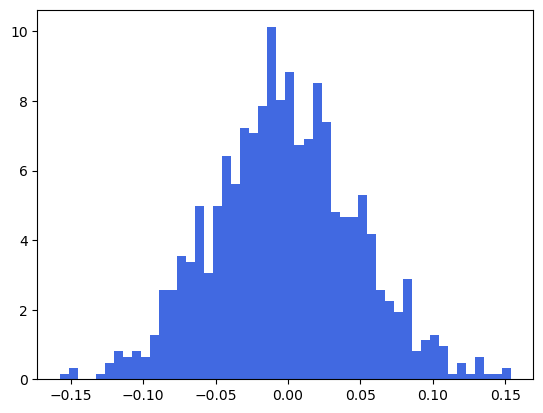

Size 5000
	Mean: -0.001522
	Var: 0.001091
	Count > 1e-1: 2


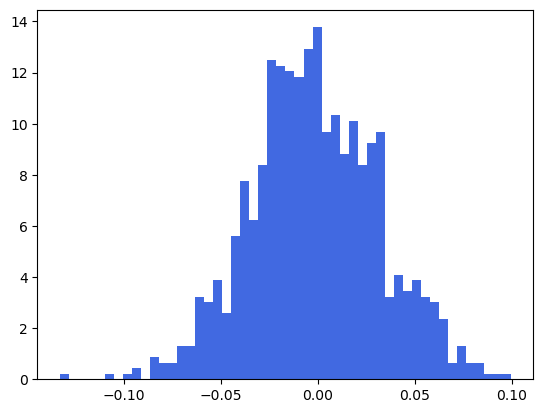

Size 10000
	Mean: 0.000821
	Var: 0.000492
	Count > 1e-1: 0


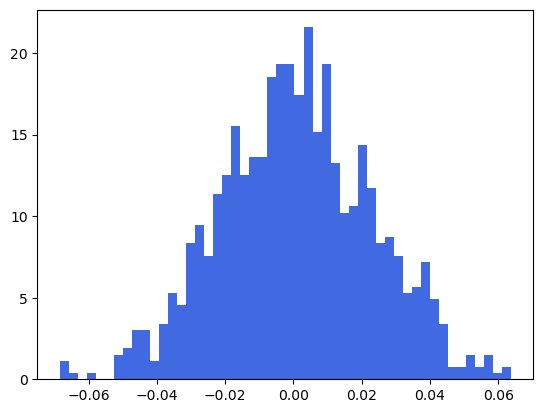

In [5]:
def main():
    for size in sample_sizes:
        diffs = []
        for _ in range(sample_count):
            sample = poisson.rvs(theoretical_theta, size=size)
            mean = sample_moment(sample, 1)
            bayes = (mean + k / size) * (lmbda / (lmbda +  1 / size))
            diffs.append(bayes - theoretical_theta)

        print("Size %d" % size)
        print("\tMean: %f" % sample_moment(diffs, 1)) # mean
        print("\tVar: %f" % sample_central_moment(diffs, 2)) # variance
        print("\tCount > 1e-1: %d" % len(list(filter(lambda x: abs(x) > 1e-1, diffs))))
        print_hist(diffs)

if __name__ == '__main__':
    main()